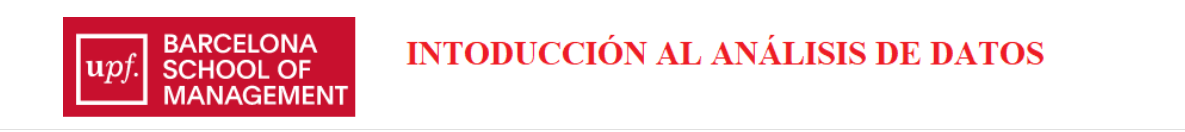

### Análisis del precio de ciertos stocks


Analizaremos:
1. Información propia de cada stock
    + columnas multinivel
    + formato de fechas
    
- 1.A. Ventana de tiempo de cada stock ( Desde cuando esta cotizando cada stock?)
- 1.B.Que elementos financieros propios del stock afectan el precio?
     + Splits
     + Dividendos
2. Mercado Perfecto
+ Estacionareidad

3. Outliers
4. Análisis de tendencias

In [51]:

import pandas as pd  
import datetime  
import yfinance as yf

symbol = ["AAPL", "MSFT", "INTC", "IBM", "CSCO"]  

#start_date = "2000-10-02"
#end_date = "2023-01-01"

#stocks = yf.download(symbol, start=start_date, end=end_date)
stocks = yf.download(symbol, start="2022-10-20", end="2024-10-20")
stocks.head(2)
      

[*********************100%***********************]  5 of 5 completed


Price                       Adj Close                                    \
Ticker                           AAPL       CSCO         IBM       INTC   
Date                                                                      
2022-10-20 00:00:00+00:00  141.818665  39.193722  117.493866  24.813236   
2022-10-21 00:00:00+00:00  145.656143  40.217964  118.959091  25.660007   

Price                                       Close                         \
Ticker                           MSFT        AAPL       CSCO         IBM   
Date                                                                       
2022-10-20 00:00:00+00:00  232.147903  143.389999  41.709999  128.300003   
2022-10-21 00:00:00+00:00  238.016724  147.270004  42.799999  129.899994   

Price                                             ...        Open             \
Ticker                          INTC        MSFT  ...        AAPL       CSCO   
Date                                              ...                          
2022-10-20 00:00:00+00:00  26.080000  236.149994  ...  143.020004  41.560001   
2022-10-21 00:00:00+00:00  26.969999  242.119995  ...  142.869995  41.849998   

Price                                                       Volume            \
Ticker                            IBM   INTC        MSFT      AAPL      CSCO   
Date                                                                           
2022-10-20 00:00:00+00:00  126.250000  26.15  235.770004  64522000  16830500   
2022-10-21 00:00:00+00:00  128.389999  25.85  234.740005  86548600  25035000   

Price                                                    
Ticker                          IBM      INTC      MSFT  
Date                                                     
2022-10-20 00:00:00+00:00  13623100  33247700  21811000  
2022-10-21 00:00:00+00:00   7201300  53058700  26299700  

[2 rows x 30 columns]

In [31]:
# seleccionar datos multinivel

stocks_df2 = stocks[['Adj Close']]
stocks_df2.head()

Price                       Adj Close                                    \
Ticker                           AAPL       CSCO         IBM       INTC   
Date                                                                      
2022-10-20 00:00:00+00:00  141.818665  39.193722  117.493866  24.813236   
2022-10-21 00:00:00+00:00  145.656143  40.217964  118.959091  25.660007   
2022-10-24 00:00:00+00:00  147.812271  40.913322  121.514107  25.859810   
2022-10-25 00:00:00+00:00  150.670609  41.683857  121.733879  26.078636   
2022-10-26 00:00:00+00:00  147.713348  41.702644  123.638710  25.888348   

Price                                  
Ticker                           MSFT  
Date                                   
2022-10-20 00:00:00+00:00  232.147903  
2022-10-21 00:00:00+00:00  238.016724  
2022-10-24 00:00:00+00:00  243.059814  
2022-10-25 00:00:00+00:00  246.412018  
2022-10-26 00:00:00+00:00  227.399780

### 1. Información propia de cada stock

**columnas multinivel**

In [5]:
#El primer nivel será el nivel "0" es el  ('Adj Close'), que describe el tipo de dato .
#El segundo nivel será el nivel "1" es el "Stock" ('AAPL', 'MSFT', etc.).

stocks_df2.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'CSCO'),
            ('Adj Close',  'IBM'),
            ('Adj Close', 'INTC'),
            ('Adj Close', 'MSFT')],
           names=['Price', 'Ticker'])

In [32]:
#cambia los nombres de las columnas al segundo nivel
stocks_df2.columns = stocks_df2.columns.get_level_values(1)
stocks_df2.head()

Ticker,AAPL,CSCO,IBM,INTC,MSFT
Date,,,,,
2022-10-20 00:00:00+00:00,141.818665,39.193722,117.493866,24.813236,232.147903
2022-10-21 00:00:00+00:00,145.656143,40.217964,118.959091,25.660007,238.016724
2022-10-24 00:00:00+00:00,147.812271,40.913322,121.514107,25.859810,243.059814
2022-10-25 00:00:00+00:00,150.670609,41.683857,121.733879,26.078636,246.412018
2022-10-26 00:00:00+00:00,147.713348,41.702644,123.638710,25.888348,227.399780


In [33]:
stocks_df2.loc['2022-10-20':'2024-10-20']

Ticker,AAPL,CSCO,IBM,INTC,MSFT
Date,,,,,
2022-10-20 00:00:00+00:00,141.818665,39.193722,117.493866,24.813236,232.147903
2022-10-21 00:00:00+00:00,145.656143,40.217964,118.959091,25.660007,238.016724
2022-10-24 00:00:00+00:00,147.812271,40.913322,121.514107,25.859810,243.059814
2022-10-25 00:00:00+00:00,150.670609,41.683857,121.733879,26.078636,246.412018
2022-10-26 00:00:00+00:00,147.713348,41.702644,123.638710,25.888348,227.399780
...,...,...,...,...,...
2024-10-14 00:00:00+00:00,231.300003,54.270000,235.259995,23.440001,419.140015
2024-10-15 00:00:00+00:00,233.850006,54.080002,232.960007,22.660000,418.739990
2024-10-16 00:00:00+00:00,231.779999,56.380001,233.669998,22.309999,416.119995


In [27]:
stocks_df2.columns

Index(['AAPL', 'CSCO', 'IBM', 'INTC', 'MSFT'], dtype='object', name='Ticker')

## formato de fechas**

In [34]:
stocks_df2.index = stocks_df2.index.tz_localize(None) # tz_localize(None), localiza los None en el indice
stocks_df2.index = stocks_df2.index.strftime('%Y-%m-%d') # .strftime('%Y-%m-%d'), cambia el formato de la fecha todo se vuelve a guardar en la misma variable

stocks_df2.head()

Ticker,AAPL,CSCO,IBM,INTC,MSFT
Date,,,,,
2022-10-20,141.818665,39.193722,117.493866,24.813236,232.147903
2022-10-21,145.656143,40.217964,118.959091,25.660007,238.016724
2022-10-24,147.812271,40.913322,121.514107,25.859810,243.059814
2022-10-25,150.670609,41.683857,121.733879,26.078636,246.412018
2022-10-26,147.713348,41.702644,123.638710,25.888348,227.399780


In [15]:
(stocks_df2.index).dtype

dtype('O')

**1.A. Ventana de tiempo de cada stock ( Desde cuando esta cotizando cada stock?)**

In [16]:
stocks_df2['AAPL'].first_valid_index()

'1990-02-16'

In [17]:
stocks_df2["IBM"].first_valid_index()

'1990-02-16'

In [18]:
stocks_df2['AAPL'].last_valid_index()

'2024-10-18'

In [19]:
# Encontrar el índice del primer registro con información para cada columna
for x in stocks_df2.columns:
    primer_indice_con_informacion = stocks_df2[x].first_valid_index()
    ultimo_indice_no_nulo = stocks_df2[x].last_valid_index()
    print(f"para '{x}': inicia en  {primer_indice_con_informacion} y finaliza en {ultimo_indice_no_nulo}")


para 'AAPL': inicia en  1990-02-16 y finaliza en 2024-10-18
para 'CSCO': inicia en  1990-02-16 y finaliza en 2024-10-18
para 'IBM': inicia en  1990-02-16 y finaliza en 2024-10-18
para 'INTC': inicia en  1990-02-16 y finaliza en 2024-10-18
para 'MSFT': inicia en  1990-02-16 y finaliza en 2024-10-18


**1.B.Que elementos financieros propios del stock afectan el precio?**

**Un split** consiste en aumentar el número de acciones en circulación de una compañía, dividiendo las originales en nuevas acciones de menor valor nominal. El aumento en el número de acciones y la disminución del valor nominal de las nuevas acciones es inversamente proporcional. El desdoblamiento que se obtiene al llevar a cabo el split de una acción suele realizarse para proporcionar una mayor liquidez a la contratación en los mercados financieros. Al darse un split, los accionistas pasan a contar en su cartera con mayor número de títulos a precio menor teniendo en cuenta la proporción empleada.

In [20]:
stock = yf.Ticker("INTC")
splits = stock.splits
splits

Date
1980-10-09 00:00:00-04:00    2.0
1983-07-01 00:00:00-04:00    2.0
1987-10-29 00:00:00-05:00    1.5
1993-06-07 00:00:00-04:00    2.0
1995-06-19 00:00:00-04:00    2.0
1997-07-14 00:00:00-04:00    2.0
1999-04-12 00:00:00-04:00    2.0
2000-07-31 00:00:00-04:00    2.0
Name: Stock Splits, dtype: float64

In [21]:
# Definir los símbolos de las acciones
symbols = ["AAPL", "MSFT", "INTC", "IBM", "CSCO"]

# Definir el rango de fechas
#start_date = "2000-10-02"
#end_date = "2023-01-01"


# Iterar a través de los símbolos y obtener información sobre los splits
for symbol in symbols:
    stock = yf.Ticker(symbol)
    splits = stock.splits
    #splits_info[symbol] = splits
    print(symbol, splits)

AAPL Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64
MSFT Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64
INTC Date
1980-10-09 00:00:00-04:00    2.0
1983-07-01 00:00:00-04:00    2.0
1987-10-29 00:00:00-05:00    1.5
1993-06-07 00:00:00-04:00    2.0
1995-06-19 00:00:00-04:00    2.0
1997-07-14 00:00:00-04:00    2.0
1999-04-12 00:00:00-04:00    2.0
2000-07-31 00:00:00-04:00    2.0
Name: Stock Splits, dtype: float64
IBM Date
1964-05-18 00:00:00-04:00    1.250
1966-05-18 00:00:00-04:00    1.500
1968-04-23 00:00:00-05:00    2.000
1973-05-29 00:00:00-04:00

In [14]:
# Definir los símbolos de las acciones
symbols = ["AAPL", "MSFT", "INTC", "IBM", "CSCO"]

# Definir el rango de fechas
#start_date = "2000-10-02"
#end_date = "2023-01-01"

# Crear un diccionario para almacenar información sobre los splits
splits_info = {}

# Iterar a través de los símbolos y obtener información sobre los splits
for x in symbols:
    stock = yf.Ticker(x)
    splits = stock.splits
    splits_info[x] = splits

print(splits_info.items())

dict_items([('AAPL', Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64), ('MSFT', Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64), ('INTC', Date
1980-10-09 00:00:00-04:00    2.0
1983-07-01 00:00:00-04:00    2.0
1987-10-29 00:00:00-05:00    1.5
1993-06-07 00:00:00-04:00    2.0
1995-06-19 00:00:00-04:00    2.0
1997-07-14 00:00:00-04:00    2.0
1999-04-12 00:00:00-04:00    2.0
2000-07-31 00:00:00-04:00    2.0
Name: Stock Splits, dtype: float64), ('IBM', Date
1964-05-18 00:00:00-04:00    1.250
1966-05-18 00:00:00-04:00    1.500
1968-04-23 00:00:00-05:00 

**Dividendos**

**Los dividendos** son básicamente una parte de las ganancias que una empresa decide compartir con sus accionistas. Si tienes acciones de una empresa, esto significa que podrías recibir dinero si la empresa decide repartirlos.

In [14]:
# Definir los símbolos de las acciones
symbols = ["AAPL", "MSFT", "INTC", "IBM", "CSCO"]

# Crear un diccionario para almacenar los dividendos
dividends_info = {}

# Iterar a través de los símbolos y obtener los dividendos
for x in symbols:
    stock = yf.Ticker(x)
    dividends = stock.dividends
    dividends_info[x] = dividends

print(dividends_info)

{'AAPL': Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
Name: Dividends, Length: 84, dtype: float64, 'MSFT': Date
2003-02-19 00:00:00-05:00    0.08
2003-10-15 00:00:00-04:00    0.16
2004-08-23 00:00:00-04:00    0.08
2004-11-15 00:00:00-05:00    3.08
2005-02-15 00:00:00-05:00    0.08
                             ... 
2023-08-16 00:00:00-04:00    0.68
2023-11-15 00:00:00-05:00    0.75
2024-02-14 00:00:00-05:00    0.75
2024-05-15 00:00:00-04:00    0.75
2024-08-15 00:00:00-04:00    0.75
Name: Dividends, Length: 83, dtype: float64, 'INTC': Date
1992-10-26 00:00:00-05:00    0.003125
1993-01-26 00:00:00-05:00    0.003125
19

## 2. Mercado Perfecto:

Un mercado perfecto es aquel donde existen muchos compradores y vendedores. Esto permitirá que ningún competidor tenga poder para establecer el precio de mercado.

El mercado perfecto, además, solo puede funcionar cuando todos los que compran y venden poseen una información completa sobre la oferta, la demanda y las condiciones cómo se mueve el mercado.

### Estacionariedad

La estacionariedad es un concepto fundamental en el análisis de series temporales en estadística y econometría. Se refiere a la propiedad de una serie temporal que tiene estadísticas constantes a lo largo del tiempo. Específicamente, una serie temporal es estacionaria si sus propiedades estadísticas, como la media, la varianza y la covarianza, no cambian a lo largo del tiempo.

La estacionariedad en términos simples se refiere a cuando una serie temporal (es decir, datos que se recogen y se ordenan en el tiempo, como precios de acciones, temperaturas diarias, etc.) mantiene patrones estables a lo largo del tiempo.

Una serie temporal es estacionaria cuando:

La media (promedio) no cambia con el tiempo. Por ejemplo, si observas los precios de una acción, la media debe permanecer más o menos constante.
La varianza (dispersión o fluctuación de los datos) es constante. Esto significa que los valores no se vuelven más dispersos ni más concentrados a medida que pasa el tiempo.
No tiene tendencias (como una tendencia a subir o bajar de manera constante) o estacionalidades (cambios repetidos en períodos específicos, como las ventas de tiendas que siempre aumentan en diciembre).

Los precios de los activos tienden a tener tendencias y pueden mostrar comportamiento no estacionario, como incrementos a largo plazo. Esto significa que sus medias y varianzas cambian con el tiempo.
Los rendimientos, que son las variaciones porcentuales o logarítmicas de los precios, suelen ser más estacionarios. Por lo tanto, aplicar la prueba ADF a los rendimientos puede proporcionar resultados más confiables.

Prueba de Dickey-Fuller Aumentada (ADF): Esta prueba se utiliza para evaluar si una serie de tiempo es estacionaria  
Si se rechaza la hipótesis nula en la prueba ADF, sugiere que la serie de tiempo es estacionaria.

##### Todo ello en la poblacion

Ho y H1 son PRUEBAS DE HIPOTESIS, Todo ello depende del nivel de confianza. (95,98 99%....)

Ho: la serie no es estacionaria

H1: la serie es estacionaria 




In [45]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import adfuller

In [46]:
stocks_df2=stocks_df2.dropna()
stocks_df2.head()

Ticker,AAPL,CSCO,IBM,INTC,MSFT
Date,,,,,
2022-10-20,141.818665,39.193722,117.493866,24.813236,232.147903
2022-10-21,145.656143,40.217964,118.959091,25.660007,238.016724
2022-10-24,147.812271,40.913322,121.514107,25.859810,243.059814
2022-10-25,150.670609,41.683857,121.733879,26.078636,246.412018
2022-10-26,147.713348,41.702644,123.638710,25.888348,227.399780


In [47]:
result = adfuller(stocks_df2["AAPL"])
result

(np.float64(-0.6355180776922864),
 np.float64(0.8627527622918221),
 0,
 501,
 {'1%': np.float64(-3.443470002903981),
  '5%': np.float64(-2.867326248740681),
  '10%': np.float64(-2.569851849873108)},
 np.float64(2287.827671897496))

In [48]:
result = adfuller(stocks_df2["AAPL"])
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])


Estadístico ADF: -0.6355180776922864
Valor p: 0.8627527622918221


Podemos decir que es un stock no estacionario ya que se se acerca a 1 = Hipotesis Ho

In [49]:
for symbol in stocks_df2.columns:
    result = adfuller(stocks_df2[symbol])
    print('Estadístico ADF:', symbol)
    #print('Estadístico ADF:', result[0])
    print('Valor p:', result[1])
    

Estadístico ADF: AAPL
Valor p: 0.8627527622918221
Estadístico ADF: CSCO
Valor p: 0.1499947548156516
Estadístico ADF: IBM
Valor p: 0.9955778302772195
Estadístico ADF: INTC
Valor p: 0.6009458213293557
Estadístico ADF: MSFT
Valor p: 0.698648005975795


## 3. Outliers

In [52]:
symbol = ["AAPL", "MSFT", "INTC", "IBM", "CSCO"]

for i in symbol:
    Q1 = stocks_df2[i].quantile(0.25)
    Q3 = stocks_df2[i].quantile(0.75)
    
    # Calcular el IQR (Rango Intercuartil)
    IQR = Q3 - Q1

    # Definir los límites superior e inferior para identificar outliers
    limite_superior = Q3 + 1.5 * IQR
    limite_inferior = Q1 - 1.5 * IQR

    # Filtrar los outliers
    datos_filtrados = stocks_df2[i][(stocks_df2[i]>= limite_inferior) & (stocks_df2[i] <= limite_superior)]
    datos_max = stocks_df2[i][ (stocks_df2[i] >= limite_superior)]
    datos_min = stocks_df2[i][(stocks_df2[i]<= limite_inferior)]
    
    
    print(f'Reporte para {i}: con registros iniciales {stocks_df2[i].shape} con {datos_max.shape} outliers superiores y {datos_min.shape} outliers inferiores')

Reporte para AAPL: con registros iniciales (502,) con (3,) outliers superiores y (0,) outliers inferiores
Reporte para MSFT: con registros iniciales (502,) con (0,) outliers superiores y (0,) outliers inferiores
Reporte para INTC: con registros iniciales (502,) con (7,) outliers superiores y (0,) outliers inferiores
Reporte para IBM: con registros iniciales (502,) con (0,) outliers superiores y (0,) outliers inferiores
Reporte para CSCO: con registros iniciales (502,) con (4,) outliers superiores y (2,) outliers inferiores


## 4. Análisis de tendencias

Un análisis inicial podría incluir la visualización de los precios históricos en un gráfico de líneas a lo largo del tiempo. Esto ayudaría a identificar tendencias generales, como si el precio de las acciones ha estado aumentando, disminuyendo o manteniéndose estable

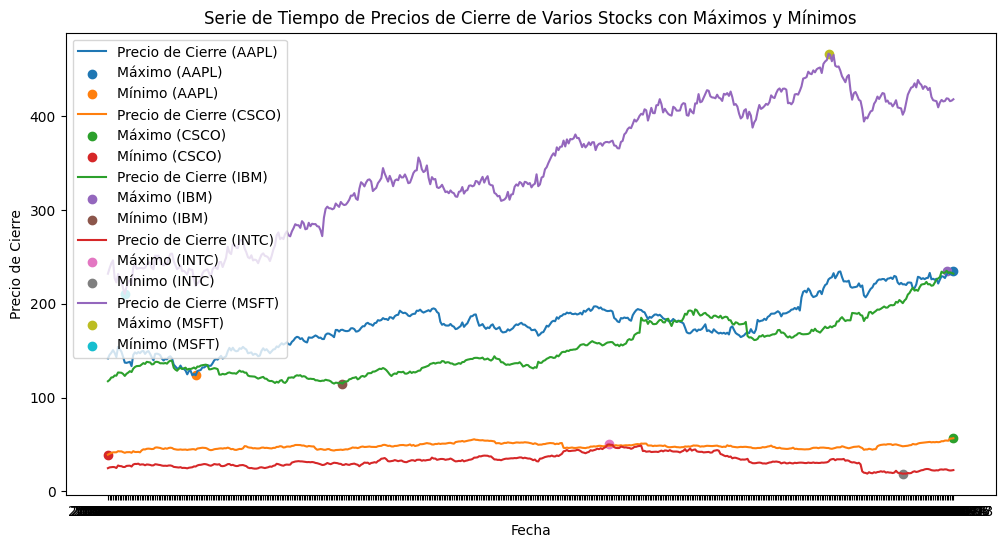

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for symbol, data in stocks_df2.items():
    plt.plot(data.index, data.values, label=f'Precio de Cierre ({symbol})')

    # Encontrar el máximo y mínimo de la serie de tiempo
    maximo = data.max()
    minimo = data.min()

    # Resaltar el máximo y mínimo en la gráfica
    plt.scatter(data.idxmax(), maximo, label=f'Máximo ({symbol})')
    plt.scatter(data.idxmin(), minimo, label=f'Mínimo ({symbol})')

# Configurar etiquetas y leyenda
plt.title('Serie de Tiempo de Precios de Cierre de Varios Stocks con Máximos y Mínimos')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()

# Mostrar la gráfica
plt.show()

### 5. Análisis de precios vs volatilidades móviles (30 dias)

[*********************100%***********************]  1 of 1 completed


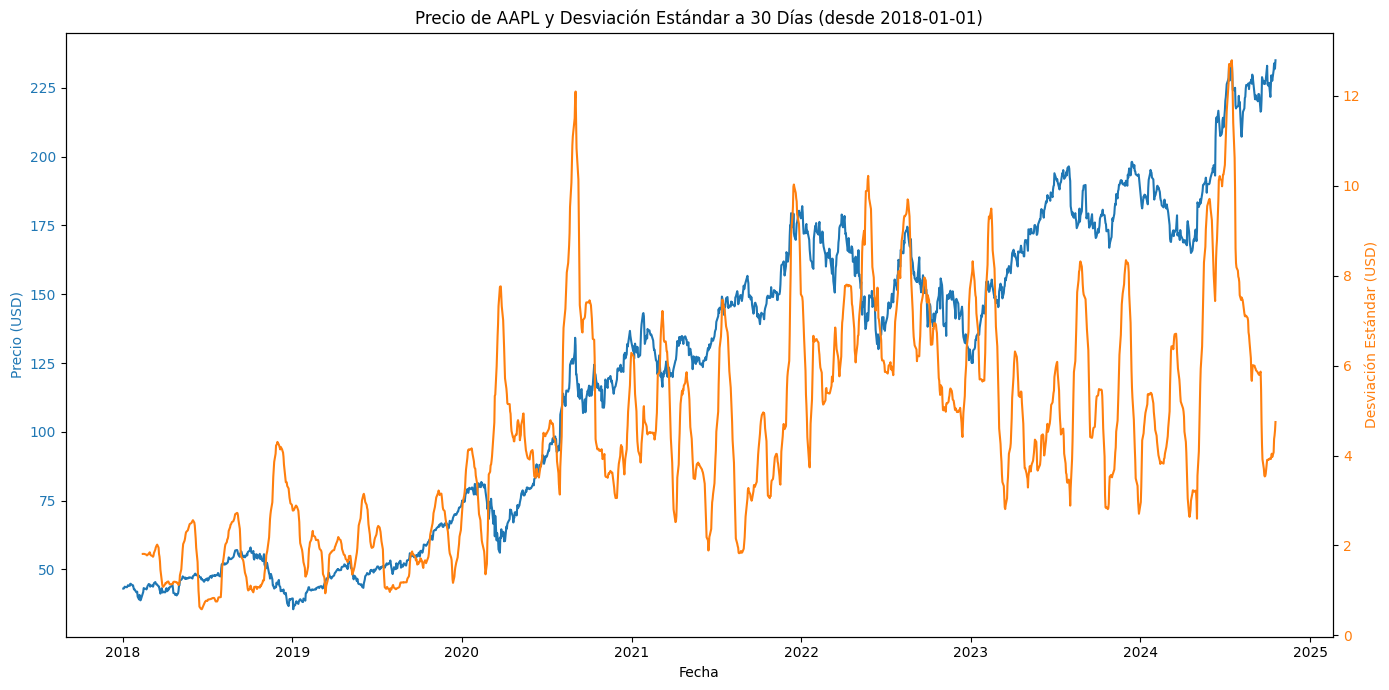

In [54]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Definir el símbolo y las fechas
symbol = "AAPL"
start_date = "2018-01-01"
end_date = pd.Timestamp.now().strftime('%Y-%m-%d')

# Descargar los precios de AAPL
data = yf.download(symbol, start=start_date, end=end_date)

# Calcular la desviación estándar a 30 días-medias móviles 
data['Std_30'] = data['Close'].rolling(window=30).std()

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Graficar los precios de AAPL
color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio (USD)', color=color)
ax1.plot(data['Close'], label='Precio de AAPL', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje y para la desviación estándar
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Desviación Estándar (USD)', color=color)  
ax2.plot(data['Std_30'], label='Desviación Estándar a 30 Días', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Títulos y leyenda
plt.title('Precio de AAPL y Desviación Estándar a 30 Días (desde 2018-01-01)')
fig.tight_layout()  
plt.show()


 lista  de las empresas incluidas en el IBEX 35 junto con sus tickers correspondientes en la Bolsa de Madrid:

- Banco Santander, S.A.: SAN.MC
- BBVA: BBVA.MC
- Telefónica, S.A.: TEF.MC
- Iberdrola, S.A.: IBE.MC
- Repsol, S.A.: REP.MC
- Inditex, S.A. (Zara): ITX.MC
- CaixaBank, S.A.: CABK.MC
- Banco de Sabadell, S.A.: SAB.MC
- Amadeus IT Group, S.A.: AMS.MC
- Red Eléctrica Corporación, S.A.: REE.MC
- Mapfre, S.A.: MAP.MC
- Banco Bilbao Vizcaya Argentaria, S.A.: BBVA.MC
- Banco de Santander, S.A.: SAN.MC
- Enagás, S.A.: ENG.MC
- Cellnex Telecom, S.A.: CLNX.MC
- Aena, S.M.E., S.A.: AENA.MC
- Grifols, S.A.: GRF.MC
- Endesa, S.A.: ELE.MC
- Ferrovial, S.A.: FER.MC
- Mediaset España Comunicación, S.A.: TL5.MC
- Banco Sabadell, S.A.: SAB.MC
- ACS, Actividades de Construcción y Servicios, S.A.: ACS.MC
- Meliá Hotels International, S.A.: MEL.MC
- Naturgy Energy Group, S.A.: NTGY.MC
- CIE Automotive, S.A.: CIE.MC
- Indra Sistemas, S.A.: IDR.MC
- Viscofan, S.A.: VIS.MC
- Bankia, S.A.: BKIA.MC
- FCC, Actividades de Construcción y Servicios, S.A.: FCC.MC
- Acerinox, S.A.: ACX.MC
- Banco de Sabadell, S.A.: SAB.MC
- Bankinter, S.A.: BKT.MC
- Colonial, SOCIMI, S.A.: COL.MC
- Siemens Gamesa Renewable Energy, S.A.: SGRE.MC
- PharmaMar, S.A.: PHM.MC

Esta lista puede cambiar con el tiempo debido a cambios en la composición del índice o eventos corporativos. Si necesitas información actualizada sobre los tickers de las acciones del IBEX 35, te recomiendo consultar una fuente financiera confiable o el sitio web de la Bolsa de Madrid.

In [55]:


# Utilizar comprensión de listas para extraer los tickers
tickers = [accion.split(': ')[1] for accion in listado_acciones]

# Imprimir la lista de tickers
print(tickers)

NameError: name 'listado_acciones' is not defined

In [27]:
#!pip3 install pandas_datareader
#import pandas as pd  
import datetime  # Importa el módulo datetime
import yfinance as yf


# Definir el símbolo de la acción o el índice
symbol2 = ['CABK','IBE','ITX','REP','SAB']  # Ejemplo: Apple Inc.
symbol = ['BBVA','SAN','TEF','CABK','IBE','ITX','REP','SAB' ]

# Definir el rango de fechas (en este caso, desde el 1 de enero de 2020 hasta el 1 de enero de 2023)
#start_date = "2007-10-02"
#end_date = "2023-01-01"

# Descargar datos históricos
#stocks = yf.download(symbol, start=start_date, end=end_date)
stocks = yf.download(symbol)

stocks_df2 = stocks['Adj Close']
stocks_df2.head() 
#stocks_df2.tail()

[*********************100%%**********************]  8 of 8 completed


,BBVA,CABK,IBE,ITX,REP,SAB,SAN,TEF
Date,,,,,,,,
1987-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423012
1987-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425362
1987-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.408912
1987-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.411262
1987-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.430062


In [38]:
import pandas as pd

# Encontrar el índice del primer registro con información para cada columna
for columna in stocks_df2.columns:
    primer_indice_con_informacion = stocks_df2[columna].first_valid_index()
    ultimo_indice_no_nulo = stocks_df2[columna].last_valid_index()
    print(f"para '{columna}': inicia en  {primer_indice_con_informacion} y finaliza en {ultimo_indice_no_nulo}")


para 'BBVA': inicia en  1988-12-15 00:00:00 y finaliza en 2023-10-06 00:00:00
para 'CABK': inicia en  2001-10-09 00:00:00 y finaliza en 2022-03-02 00:00:00
para 'IBE': inicia en  2007-12-28 00:00:00 y finaliza en 2018-06-28 00:00:00
para 'ITX': inicia en  2007-11-20 00:00:00 y finaliza en 2018-06-28 00:00:00
para 'REP': inicia en  2007-12-28 00:00:00 y finaliza en 2018-06-28 00:00:00
para 'SAB': inicia en  2016-12-06 00:00:00 y finaliza en 2022-03-02 00:00:00
para 'SAN': inicia en  1987-07-30 00:00:00 y finaliza en 2023-10-06 00:00:00
para 'TEF': inicia en  1987-06-12 00:00:00 y finaliza en 2023-10-06 00:00:00


In [47]:
df = pd.DataFrame(stocks_df2, index=pd.to_datetime(0))

# Encontrar el último índice no nulo en el índice (columna 'FechaHora') e imprimirlo en el formato 'YYYY-MM-DD'
ultimo_indice_no_nulo = stocks_df2.index.last_valid_index()

if ultimo_indice_no_nulo is not None:
    fecha_solo = ultimo_indice_no_nulo.strftime('%Y-%m-%d')
    print(f"Última fecha no nula en el índice: {fecha_solo}")
else:
    print("No hay valores no nulos en el índice")


TypeError: Index(...) must be called with a collection of some kind, Timestamp('1970-01-01 00:00:00') was passed